# **Telecom Churn Prediction and Analysis**

## **Objective:**
To analyze the Telecom Churn dataset and develop a predictive model that can classify and predict customer churn with better accuracy.

## **Imports**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

#### Data Fields:
- CustomerID: Unique identifier for the customer
- Gender: Customer gender (Male, Female)
- Age: Customer age
- Tenure: Number of months the customer has stayed with the company
- ServiceCalls: Number of customer service calls made
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Customer churn status (Yes or No)

In [5]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5334,6386-SZZKH,Female,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.2,Yes
516,3482-ABPKK,Female,0,No,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,54.30,1546.3,No
764,7969-FFOWG,Male,0,Yes,Yes,65,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.90,1292.6,No


## **Data Preprocessing**

In [8]:
data.shape

(7043, 21)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
data["TotalCharges"] = data['TotalCharges'].str.replace(' ', '0.0').astype(float)

In [14]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [18]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
data['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [22]:
data['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [24]:
data['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [26]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Check whether data is imbalance

<Axes: xlabel='Churn'>

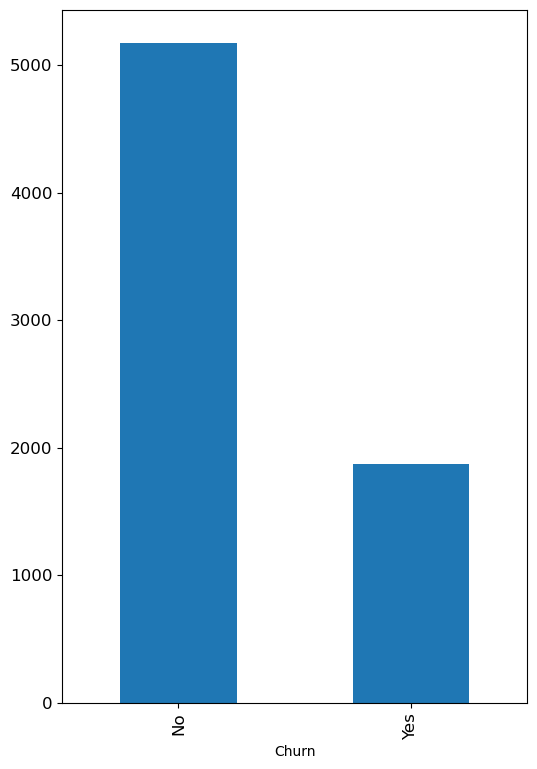

In [29]:
data['Churn'].value_counts().plot(kind='bar', figsize=(6, 9), fontsize=12)

## **Exploratory Data Analysis**

In [32]:
data.drop(columns = ['customerID'], inplace=True)

In [34]:
num_cols = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
cat_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
					'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

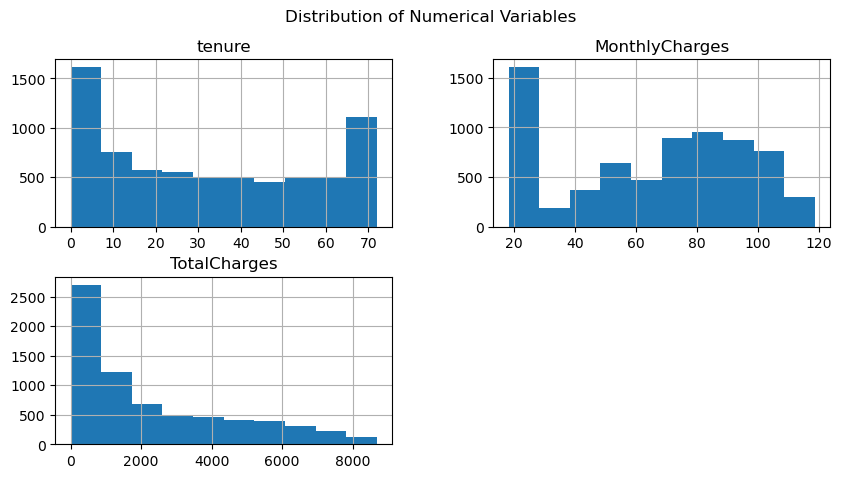

In [36]:
data[num_cols[1:]].hist(figsize=(10,5))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

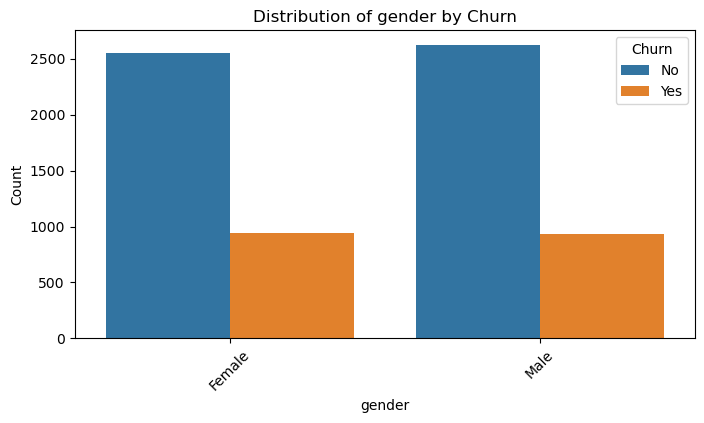

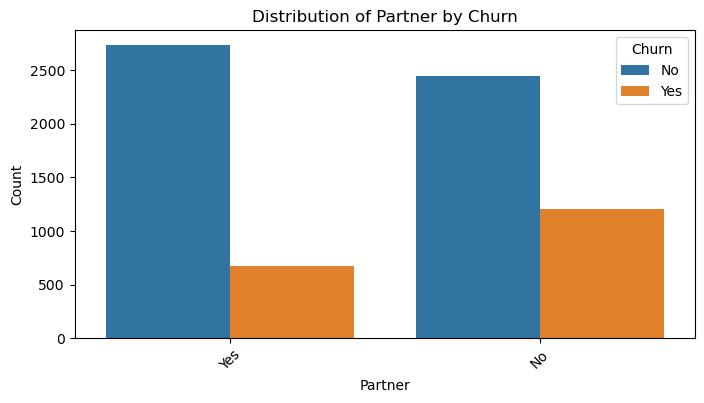

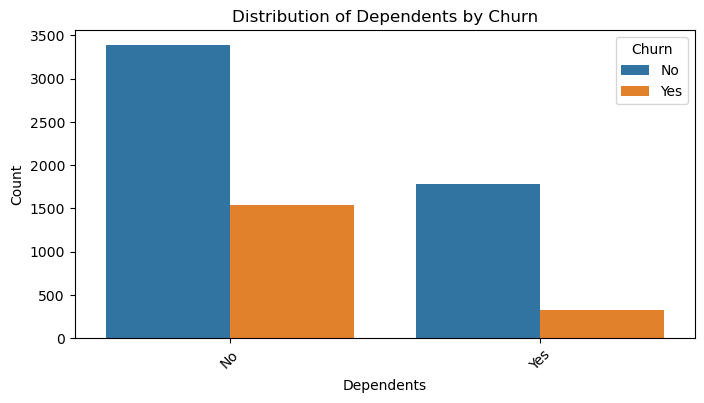

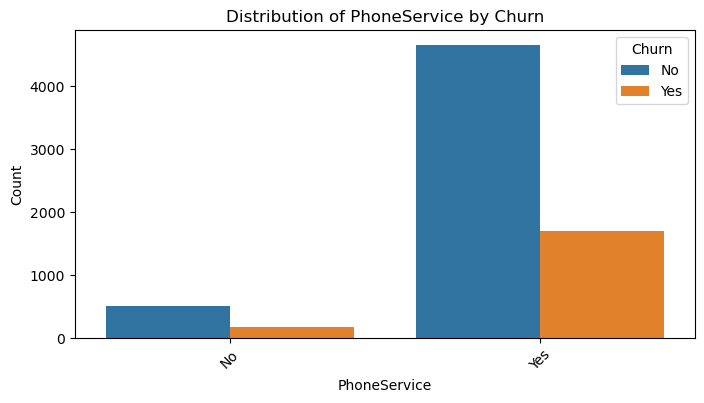

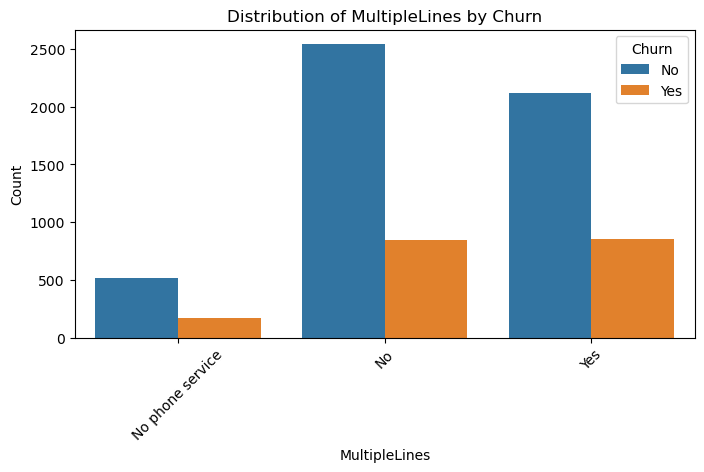

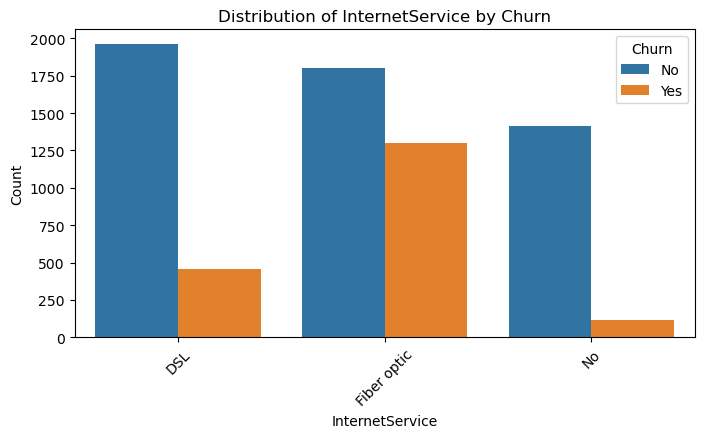

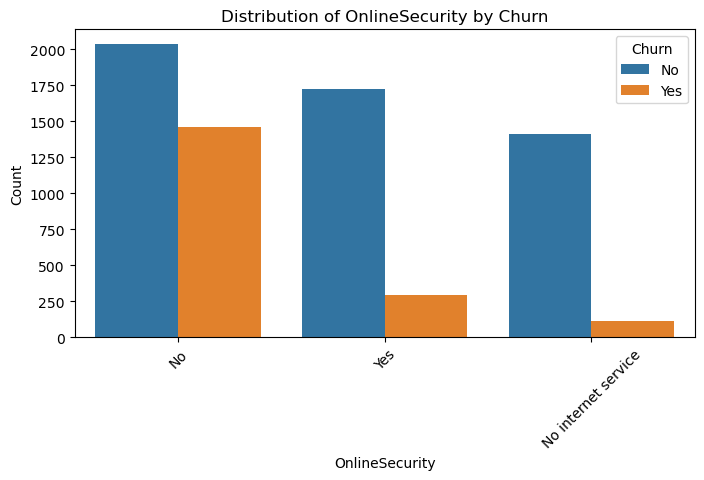

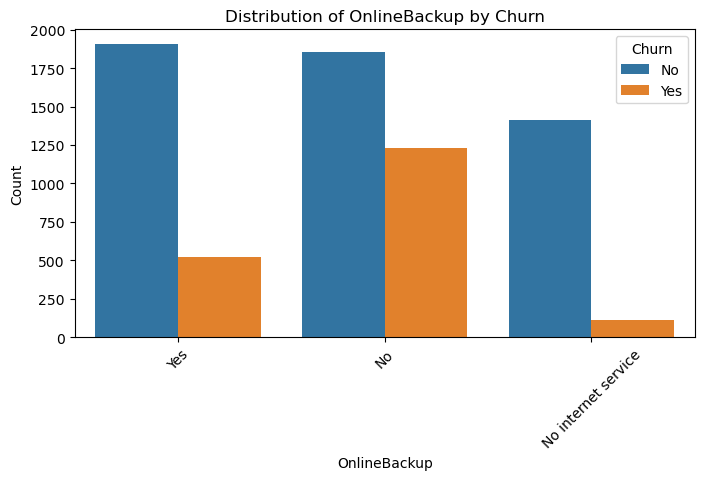

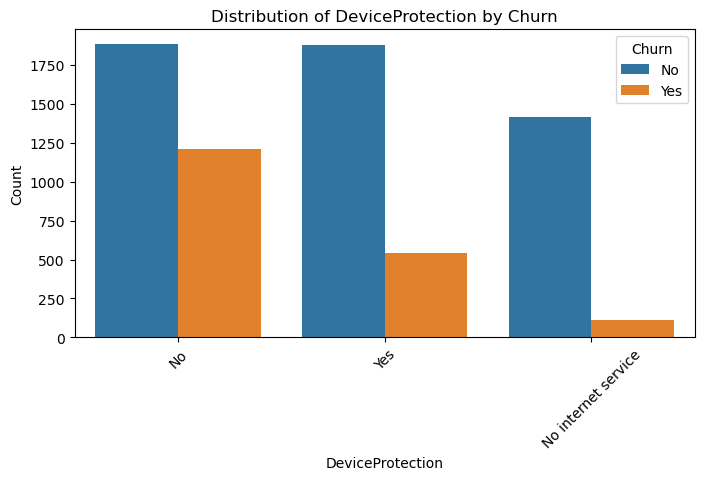

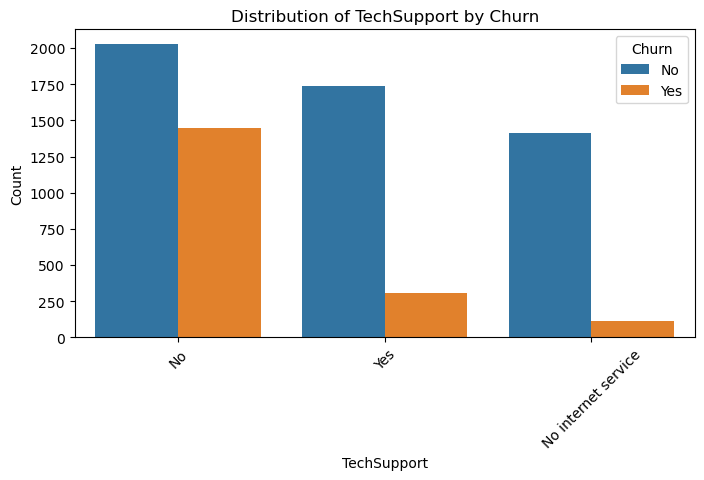

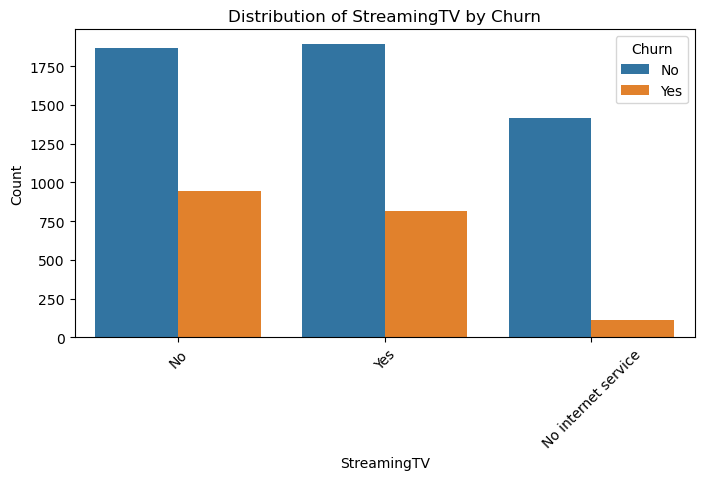

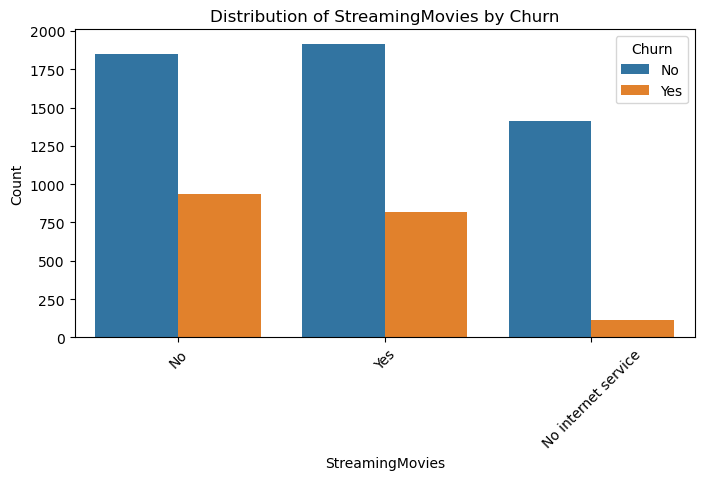

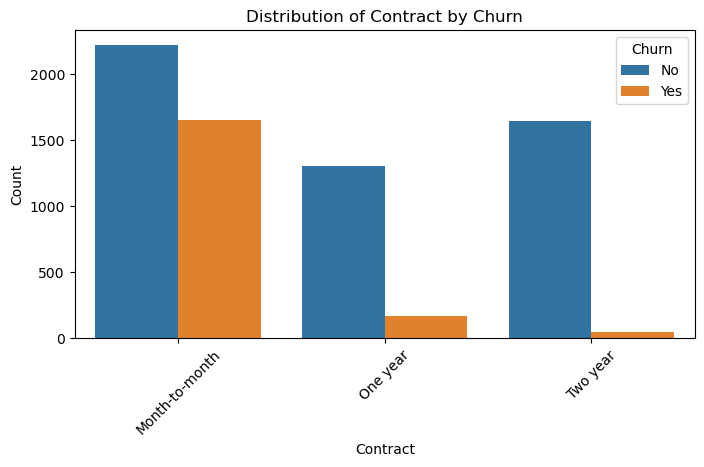

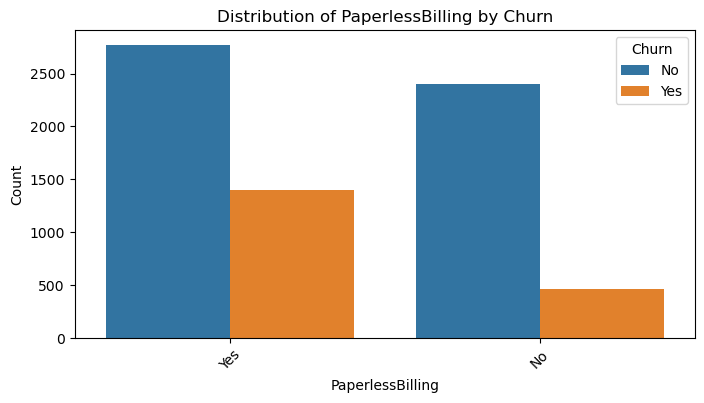

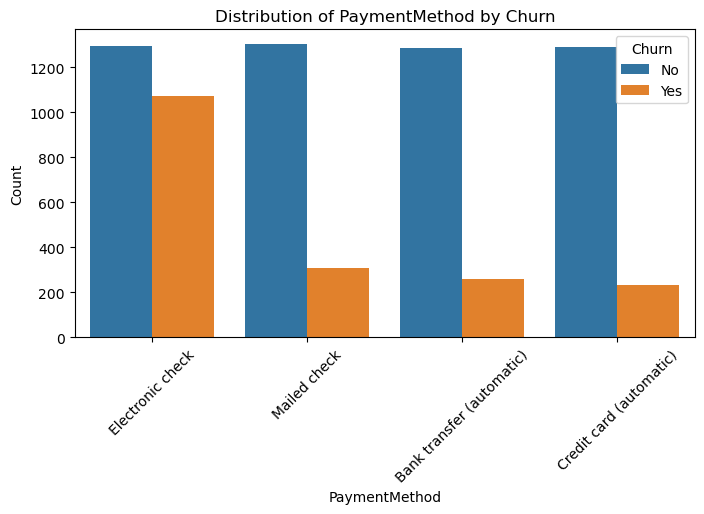

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


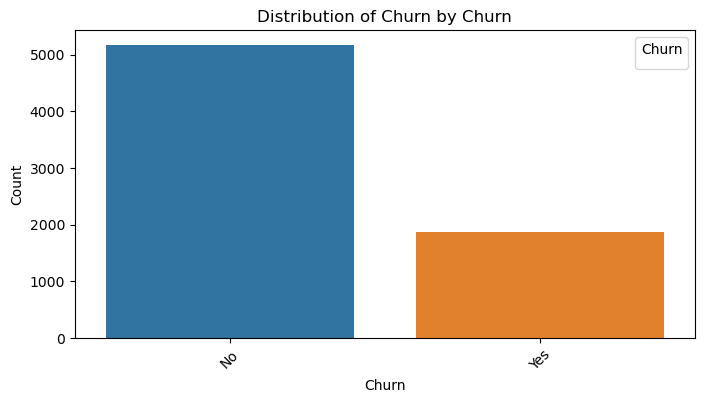

In [37]:
# Distribution of Categorical variables with Target feature

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue='Churn')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.show()

### Correlation of Features

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.103006
tenure               0.016567  1.000000        0.247900      0.826178
MonthlyCharges       0.220173  0.247900        1.000000      0.651174
TotalCharges         0.103006  0.826178        0.651174      1.000000


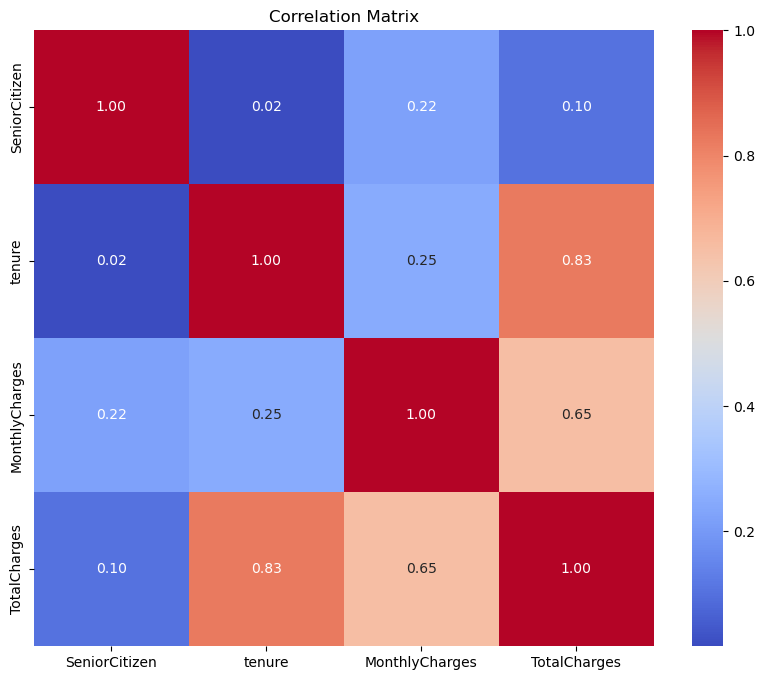

In [38]:
# Select only numeric columns
numeric_df = data.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## **Feature Engineering**

### Feature Creation

In [42]:
data['TenureGroup'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, data['tenure'].max()], 
                             labels=['New', 'Intermediate', 'Mid-term', 'Long-term', 'Very Long-term'])
data['FamilyStatus'] = (data['Partner'] == 'Yes') | (data['Dependents'] == 'Yes')
data['NumServices'] = data[['PhoneService', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 
                            'StreamingTV', 'StreamingMovies']].apply(lambda row: sum(row == 'Yes'), axis=1)

In [44]:
data.shape

(7043, 23)

### Feature Encoding

In [47]:
label_encoder = LabelEncoder()
le_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'PaperlessBilling', 'DeviceProtection',
                       'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'FamilyStatus', 'Contract','TenureGroup']

for col in le_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [49]:
# Encode nominal features
data = pd.get_dummies(data, columns=['PaymentMethod','MultipleLines','InternetService','PaymentMethod'])

In [51]:
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})

In [53]:
data = data.replace({True: 1, False: 0})

In [55]:
data.shape

(7043, 34)

### Feature Scaling

In [58]:
scaler = MinMaxScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [60]:
data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1554,1,0,0,0,0.361111,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,1
2351,0,0,0,0,0.680556,1,2,2,2,2,...,1,0,0,1,0,0,1,0,0,0
20,1,1,0,0,0.013889,0,0,0,2,0,...,0,1,0,1,0,0,0,0,1,0


### Feature Selection and SMOTE

In [63]:
X_sm = data.drop(columns=['Churn'])
y_sm = data['Churn']

In [69]:
y_sm.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [71]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=78)
X, y = sm.fit_resample(X_sm, y_sm)

In [73]:
y.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [75]:
# Recursive Feature Elimination (RFE) with a Random Forest Classifier
from sklearn.feature_selection import RFE

rf = RandomForestClassifier()
rfe = RFE(rf, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [77]:
selected_features = X.columns[rfe.support_]
selected_features

Index(['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'TenureGroup', 'NumServices',
       'InternetService_Fiber optic'],
      dtype='object')

## **Model Building**

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(8278, 33)

In [82]:
def model_building(model, x_train, y_train, x_test, y_test):

	model.fit(x_train,y_train)
	y_pred = model.predict(x_test)
    
	cm = confusion_matrix(y_test,y_pred)
	accuracy = accuracy_score(y_test, y_pred)
	precision = precision_score(y_test, y_pred)
	recall = recall_score(y_test, y_pred)
	f1 = f1_score(y_test, y_pred)
    #print(classification_report(y_test, y_pred))
    
	return [cm, accuracy, precision, recall, f1]

### Decision Tree Classifier

In [85]:
dt = DecisionTreeClassifier()
dt_metrics = model_building(dt, X_train, y_train, X_test, y_test)

In [87]:
dt_metrics

[array([[808, 213],
        [211, 838]], dtype=int64),
 0.7951690821256039,
 0.7973358705994291,
 0.7988560533841754,
 0.7980952380952381]

### Logistic Regression Classifier

In [90]:
lr = LogisticRegression(max_iter=1000)
lr_metrics = model_building(lr, X_train, y_train, X_test, y_test)

In [92]:
lr_metrics

[array([[809, 212],
        [147, 902]], dtype=int64),
 0.8265700483091788,
 0.8096947935368043,
 0.8598665395614872,
 0.8340268146093389]

## **Model Tuning**

### Logistic Regression Classifier - HyperParameter Tuning

In [96]:
from sklearn.model_selection import GridSearchCV

lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

In [98]:
lr_tuned = GridSearchCV(estimator = lr, param_grid = lr_param_grid, cv=5, scoring='accuracy')
lr_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [100]:
lr_tuned.best_params_

{'C': 100, 'penalty': 'l2'}

In [102]:
lr_best_tuned = lr_tuned.best_estimator_
lr_tuned_metrics = model_building(lr_best_tuned, X_train, y_train, X_test, y_test)
lr_tuned_metrics

[array([[820, 201],
        [146, 903]], dtype=int64),
 0.8323671497584542,
 0.8179347826086957,
 0.8608198284080076,
 0.8388295401764979]

### Decision Tree Classifier - Tuning with GridSearchCV

In [105]:
dt_param_grid = {
    'criterion': ['gini'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

In [107]:
dt_tuned = GridSearchCV(estimator = dt, param_grid = dt_param_grid, cv=5, verbose=2, n_jobs = -1)
dt_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15, 20, 25, 30]},
             verbose=2)

In [109]:
dt_tuned.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 20}

In [111]:
dt_best_tuned = dt_tuned.best_estimator_
dt_tuned_metrics = model_building(dt_best_tuned, X_train, y_train, X_test, y_test)
dt_tuned_metrics

[array([[796, 225],
        [170, 879]], dtype=int64),
 0.8091787439613527,
 0.7961956521739131,
 0.8379408960915157,
 0.8165350673478867]

### Random Forest Classifier - Tuning with RandomizedSearchCV

In [114]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = [2,4,6, 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 150, num = 15)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [116]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [118]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, None],
                                        'max_features': [2, 4, 6, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [120]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [122]:
best_random = rf_random.best_estimator_

In [124]:
rf_random_metrics = model_building(best_random, X_train, y_train, X_test, y_test)
rf_random_metrics

[array([[856, 165],
        [130, 919]], dtype=int64),
 0.857487922705314,
 0.8477859778597786,
 0.8760724499523356,
 0.8616971401781528]

## **Feature Importance and Results**

In [127]:
logistic_coefficients = lr_best_tuned.coef_[0]
feature_names = X.columns

logistic_feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': logistic_coefficients})
logistic_feature_importance = logistic_feature_importance.sort_values(by='Coefficient', ascending=False)

print(logistic_feature_importance)

                                    Feature  Coefficient
14                           MonthlyCharges    14.879958
5                              PhoneService     8.406900
15                             TotalCharges     3.617074
8                          DeviceProtection     1.599274
9                               TechSupport     1.382269
10                              StreamingTV     1.354133
6                            OnlineSecurity     1.345467
11                          StreamingMovies     1.323924
16                              TenureGroup     0.131712
17                             FamilyStatus     0.075412
13                         PaperlessBilling     0.063003
2                                   Partner    -0.228237
1                             SeniorCitizen    -0.276901
0                                    gender    -0.359479
7                              OnlineBackup    -0.512021
3                                Dependents    -0.589798
12                             

In [129]:
rf_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': best_random.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

print(rf_feature_importance)

                                    Feature  Importance
4                                    tenure    0.130871
12                                 Contract    0.129416
15                             TotalCharges    0.116535
14                           MonthlyCharges    0.114014
6                            OnlineSecurity    0.051549
16                              TenureGroup    0.050599
9                               TechSupport    0.045178
27              InternetService_Fiber optic    0.031236
18                              NumServices    0.026043
7                              OnlineBackup    0.022894
26                      InternetService_DSL    0.022554
3                                Dependents    0.019406
0                                    gender    0.018673
8                          DeviceProtection    0.017463
31           PaymentMethod_Electronic check    0.016650
13                         PaperlessBilling    0.016306
21           PaymentMethod_Electronic check    0

## **Conclusion**

### Algorithm Performances

In [134]:
name = ['DT','LR','LR Tuning', 'DT Tuning', 'RF Tuning']
score = [dt_metrics[1], lr_metrics[1], lr_tuned_metrics[1], dt_tuned_metrics[1], rf_random_metrics[1]]

In [136]:
result = {name[i]: 100*score[i] for i in range(len(name))}
result

{'DT': 79.5169082125604,
 'LR': 82.65700483091788,
 'LR Tuning': 83.23671497584542,
 'DT Tuning': 80.91787439613528,
 'RF Tuning': 85.74879227053141}

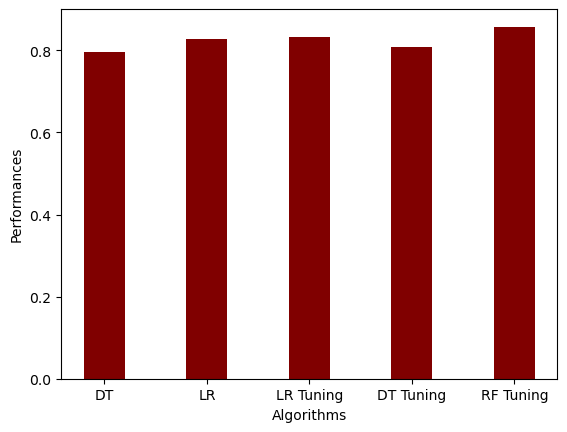

In [138]:
plt.bar(name, score, color ='maroon', width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Performances")
plt.show()

### Feature Importance Hierarchy

In [140]:
top_features_logistic = logistic_feature_importance['Feature'].head(5).tolist()
top_features_logistic

['MonthlyCharges',
 'PhoneService',
 'TotalCharges',
 'DeviceProtection',
 'TechSupport']

In [142]:
top_features_rf = rf_feature_importance['Feature'].head(5).tolist()
top_features_rf

['tenure', 'Contract', 'TotalCharges', 'MonthlyCharges', 'OnlineSecurity']

### Insights

### Actionable Insights and Recommendations:
- Implement targeted marketing campaigns focusing on TotalCharges and tenure to address specific customer needs.
- Enhance InternetService_Fiber optic and TotalCharges to improve customer satisfaction and loyalty.
- Offer incentives or loyalty programs for customers identified with high churn risk based on PaperlessBilling and Contract .
- Proactively address issues related to MultipleLines_No phone service and MonthlyCharges to prevent churn and improve customer retention.
- Monitor NumServices and OnlineSecurity to detect early signs of churn and take preventive measures.


### **Check with new data**

In [147]:
import pickle
pickle.dump(best_random, open('model.pkl','wb'))

In [177]:
check = [1.0, 0.0, 0.0, 0.0, 0.1611111111111111, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0,
  0.040398009950248763, 0.02886721628592484, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0,
  0.0, 0.0,1.0, 0.0, 0.0, 1.0, 0.0]

In [179]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([check]))

[0]
